# Работа с текстом на естественном языке.


Пример работы word2vec

In [73]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

#lang_model = api.load("glove-twitter-25")
lang_model = api.load("glove-wiki-gigaword-100")

In [74]:
# king + (woman - man)
lang_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [75]:
lang_model.most_similar(positive=['russia', 'paris'], negative=['moscow'], topn=10)

[('france', 0.8784569501876831),
 ('french', 0.6961610317230225),
 ('britain', 0.6948201656341553),
 ('europe', 0.6841811537742615),
 ('belgium', 0.6787702441215515),
 ('spain', 0.6482120752334595),
 ('switzerland', 0.643441379070282),
 ('italy', 0.6415969729423523),
 ('germany', 0.6362987160682678),
 ('prohertrib', 0.6314049363136292)]

Сентиментальный анализ текста

In [76]:
import pandas as pd
import numpy as np

sentiment_ds = pd.read_csv('https://raw.githubusercontent.com/WiMLDS/election-data-hackathon/master/first-gop-debate-twitter-sentiment/data/Sentiment.csv')

In [77]:
sentiment_small = sentiment_ds[['sentiment', 'text']]
sentiment_small.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [78]:
pos_neg_sentiment = sentiment_small[sentiment_small.sentiment != 'Neutral']
pos_neg_sentiment.head()

,sentiment,text
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,Positive,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,Negative,RT @warriorwoman91: I liked her and was happy ...


In [79]:
from pandas.api.types import CategoricalDtype

clean_sentiment_ds = pos_neg_sentiment.copy()
clean_sentiment_ds.sentiment = clean_sentiment_ds.sentiment.astype(CategoricalDtype(categories = ['Negative', 'Positive'], ordered=True)).cat.codes
clean_sentiment_ds.head()

,sentiment,text
1,1,RT @ScottWalker: Didn't catch the full #GOPdeb...
3,1,RT @RobGeorge: That Carly Fiorina is trending ...
4,1,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
5,1,"RT @GregAbbott_TX: @TedCruz: ""On my first day ..."
6,0,RT @warriorwoman91: I liked her and was happy ...


C:\Users\tuska\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

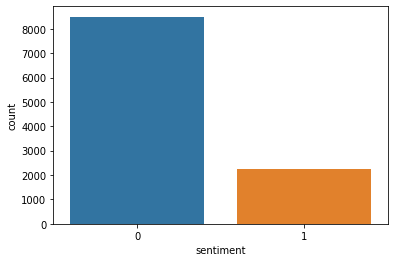

In [80]:
import seaborn as sns

sns.countplot(clean_sentiment_ds['sentiment'])

In [81]:
import re
clean_sentiment_ds['text'] = clean_sentiment_ds['text'].apply(lambda x: x.lower())

In [82]:
import re
reg = r'(?<!\w)@[\w+]{1,15}\b'
regRT = r'RT'
regWITH = r'w/'
regPOINTS = r':+'
regLINE = r'-+'
regQUOTES = r'"+'
regHASHTAG = r'(?<!\w)#[\w+]{1,15}\b'
def convertText(text):
    text=re.sub(reg, '', text, re.M)
    text=re.sub(regRT, '', text, re.M)
    text=re.sub(regWITH, '', text, re.M)
    text=re.sub(regPOINTS, '', text, re.M)
    text=re.sub(regHASHTAG, '', text, re.M)
    text=re.sub(regLINE, '', text, re.M)
    text=re.sub(regQUOTES, '', text, re.M)
    text=re.sub(regLINE, '', text, re.M)
    return text
clean_sentiment_ds['text'] = clean_sentiment_ds['text'].apply(lambda x: convertText(x))


In [83]:
clean_sentiment_ds

,sentiment,text
1,1,rt didn't catch the full last night. here ar...
3,1,rt that carly fiorina is trending hours afte...
4,1,rt delivered the highest ratings in the hi...
5,1,rt on my first day i will rescind every ille...
6,0,rt i liked her and was happy when i heard she...
...,...,...
13866,0,rt love to see men who will never be faced wi...
13867,1,rt who thought huckabee exceeded their expect...
13868,1,"rt as president, i will always tell the trut..."
13869,0,rt donald trump says that he doesn't have ti...


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = clean_sentiment_ds['text']
sentiment = clean_sentiment_ds['sentiment']

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None, sublinear_tf=True, ngram_range=(1, 1))
embeddings = vectorizer.fit_transform(corpus)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, sentiment, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, plot_confusion_matrix, classification_report

In [87]:
model = LogisticRegression(penalty='l2', C=0.3, solver='lbfgs', max_iter=150, verbose=0, random_state=42)

In [88]:
model.fit(X_train, y_train)

C:\Users\tuska\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.3, max_iter=150, random_state=42)

In [89]:
print(classification_report(y_test, model.predict(X_test), zero_division='warn'))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1713
           1       0.62      0.51      0.56       433

    accuracy                           0.84      2146
   macro avg       0.75      0.71      0.73      2146
weighted avg       0.83      0.84      0.83      2146



1. Улучшить показатели precision, recall по 1.
2. Применить другие методы машинного обучения и сравнить результат.